# Pruebas Stirling



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
class Particle:
    def __init__(self, x, y, vx, vy, Fx=0, Fy=0, Dvx=0, Dvy=0, c_x=0, W=0):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.Fx = Fx
        self.Fy = Fy
        self.Dvx = Dvx
        self.Dvy = Dvy
        self.c_x = c_x
        self.W = W

    def reset_F(self):
        self.Fx = 0
        self.Fy = 0

    def add_F(self, Fx, Fy):
        self.Fx += Fx
        self.Fy += Fy
        

In [3]:
class lf_integrator:
    def __init__(self, dti, fi, Ti):
        self.dt = dti
        self.f = fi
        self.T = Ti
        self.bonded = False

    def initialize_v(self, particles):
        for p in particles:
            p.vx += 0.5 * self.dt * p.Fx
            p.vy += 0.5 * self.dt * p.Fy

    def update_F(self, particles, k):
        for p in particles:
            p.reset_F()
            F = -k * (p.x - p.c_x)
            p.add_F(F, 0)

    def update_v1(self, particles):
        for p in particles:
            p.vx += self.dt * p.Fx
            p.vy += self.dt * p.Fy

    def impulse_Dv(self, particles):
        for p in particles:
            eta = np.random.normal(0, 1)
            p.Dvx = -self.f * p.vx + math.sqrt(self.f * (2 - self.f) * self.T) * eta

    def update_x(self, particles, k):
        for p in particles:
            dx = self.dt * (p.vx + 0.5 * p.Dvx)
            dy = self.dt * (p.vy + 0.5 * p.Dvy)
            p.x += dx
            p.y += dy
            p.W += -k * (p.x - p.c_x) * dx

    def update_v2(self, particles):
        for p in particles:
            p.vx += p.Dvx
            p.vy += p.Dvy

----------------------------------------------------------------

# paso 0: sin fuerzas

In [4]:
dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0
num_particles = 2000  # Cambiado a 100 partículas
total_steps = int(700 / dt)  # Cambiado a 200 segundos

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

time_values = np.arange(total_steps) * dt


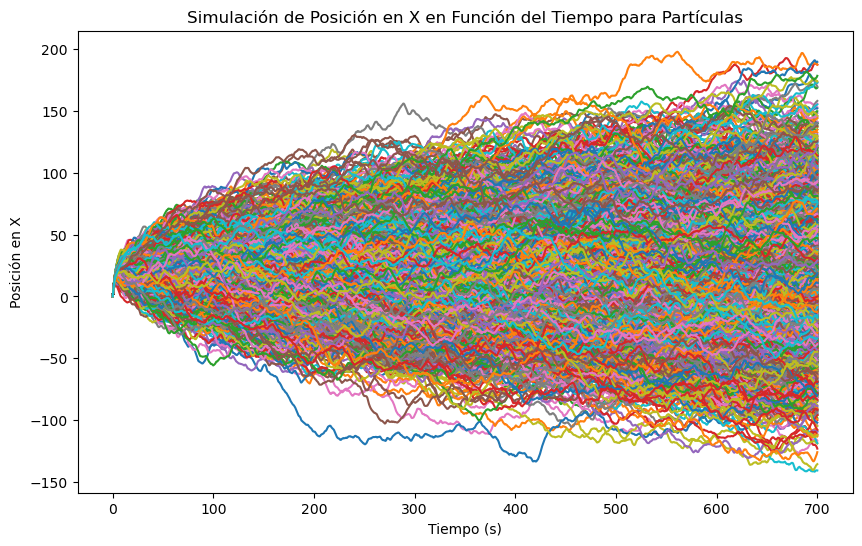

In [6]:
# Gráfico de posición en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

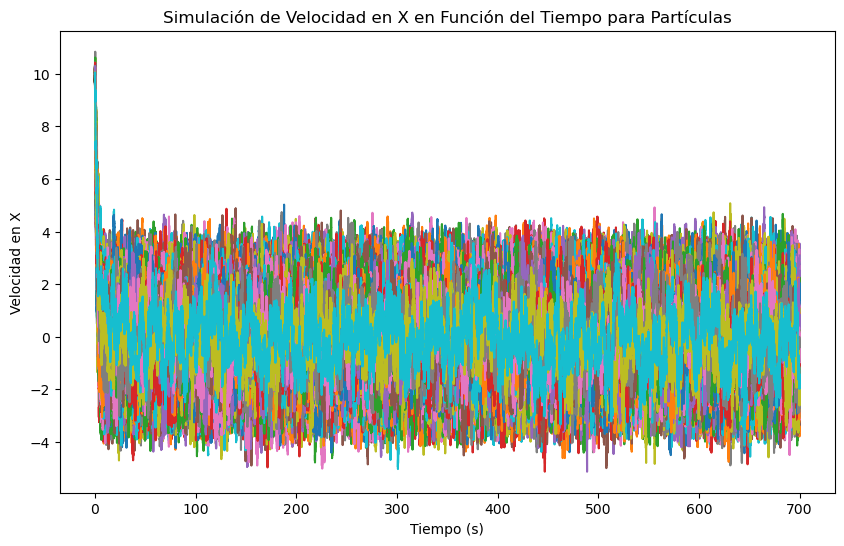

In [7]:
# Gráfico de velocidad en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')
plt.title('Simulación de Velocidad en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

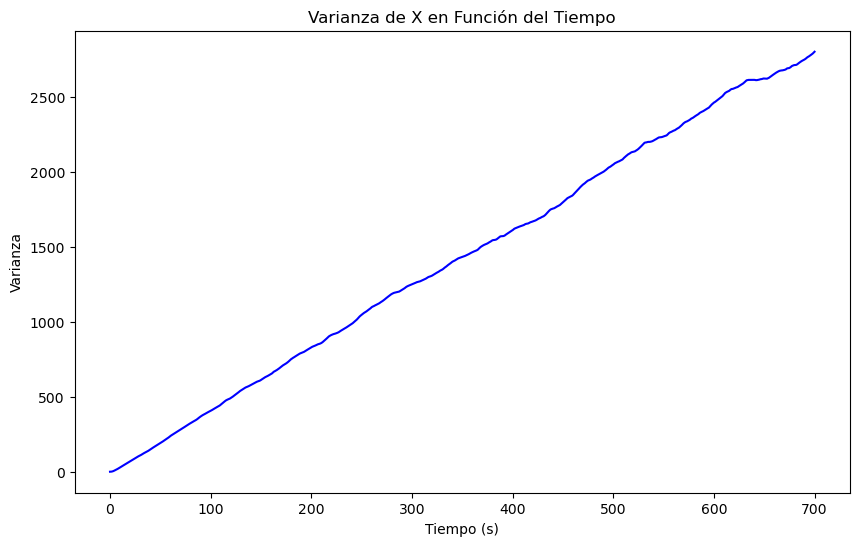

In [8]:
variances_x = np.var(positions_x, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(time_values, variances_x, color='blue')
plt.title('Varianza de X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza')
plt.show()

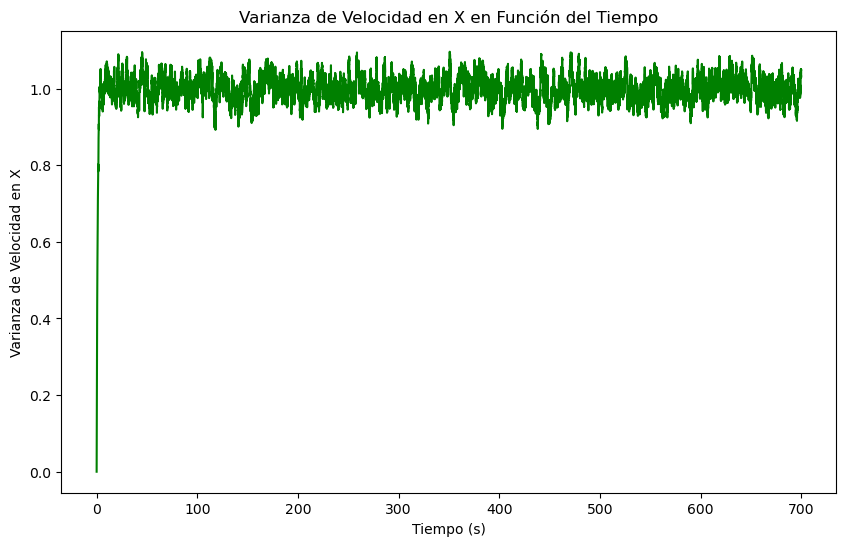

In [9]:
variances_vx = np.var(velocities_x, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time_values, variances_vx, color='green')
plt.title('Varianza de Velocidad en X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza de Velocidad en X')
plt.show()

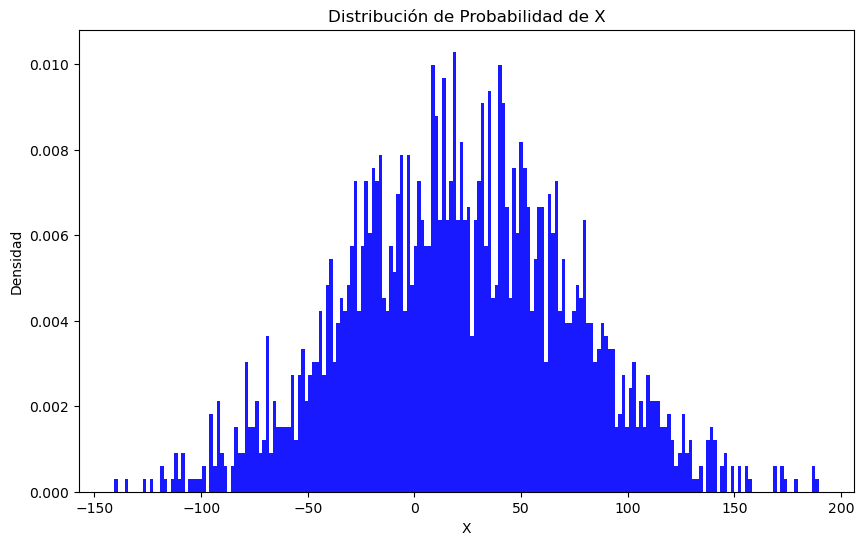

In [12]:
x_values = positions_x[:, -1]
plt.figure(figsize=(10, 6))
plt.hist(x_values, bins=200, density=True, alpha=0.9, color='blue')
plt.title('Distribución de Probabilidad de X')
plt.xlabel('X')
plt.ylabel('Densidad')
plt.show()

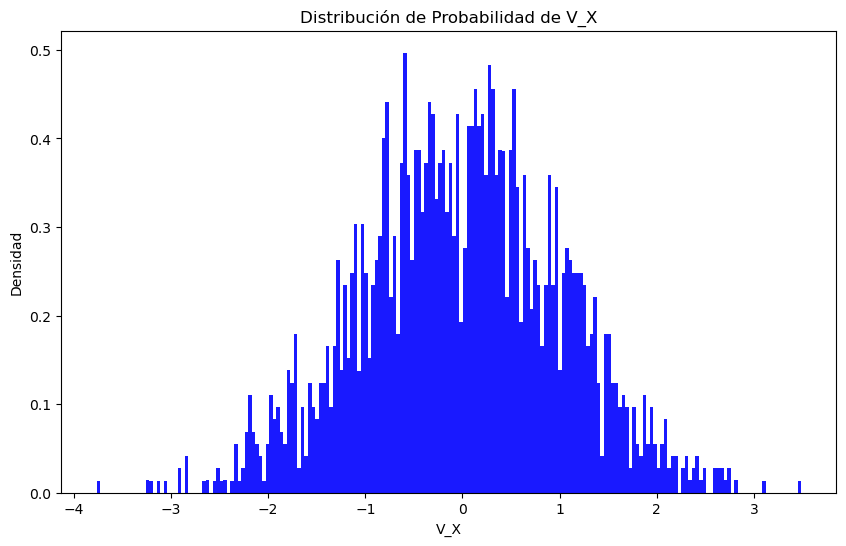

In [11]:
vx_values = velocities_x[:, -1]
plt.figure(figsize=(10, 6))
plt.hist(vx_values, bins=200, density=True, alpha=0.9, color='blue')
plt.title('Distribución de Probabilidad de V_X')
plt.xlabel('V_X')
plt.ylabel('Densidad')
plt.show()

-------------------------------------------------------------------------------------------------

# Paso 1: constante diferente de cero

In [98]:
dt = 0.01
gamma= 1
f = 1 - np.exp(-dt * gamma)
T = 10.0
k = 2.1
num_particles = 10000  # Cambiado a 100 partículas
total_steps = int(100 / dt)  # Cambiado a 200 segundos

# Inicializar partículas
particles = [Particle(x=10, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados
time_values = np.arange(total_steps) * dt



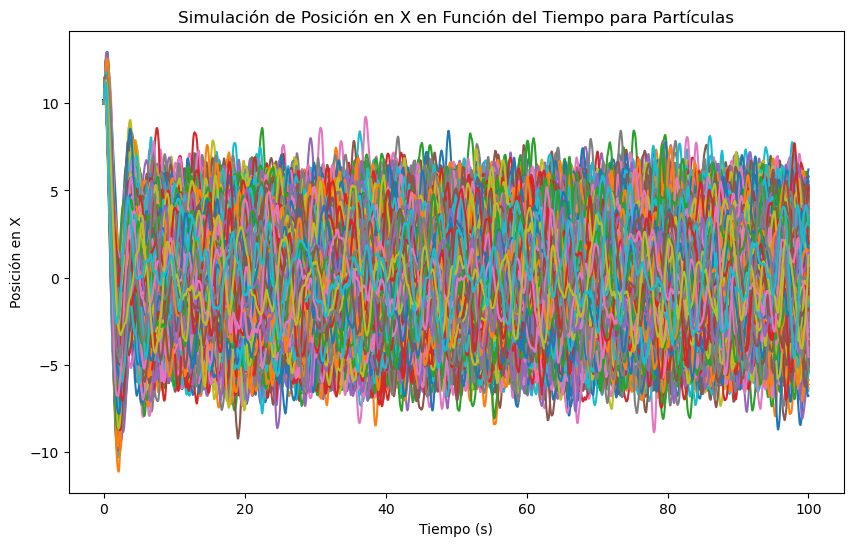

In [99]:
# Gráfico de posición en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

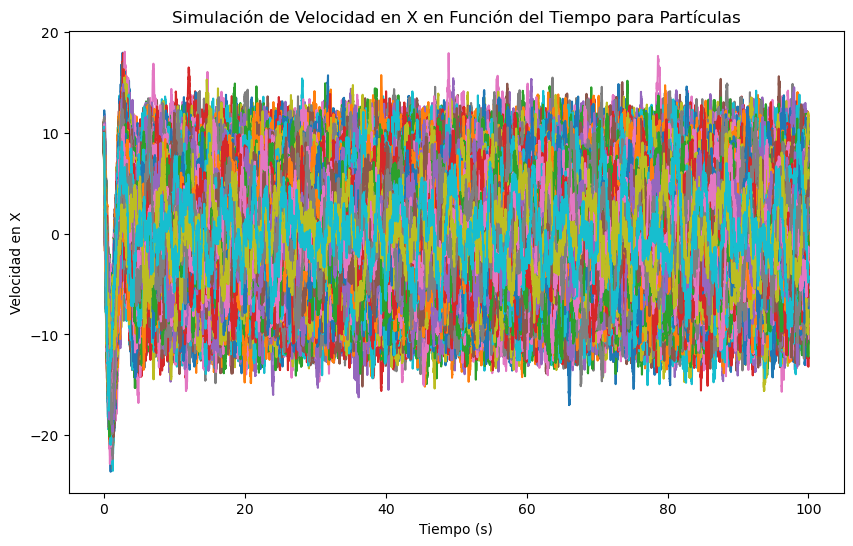

In [100]:
# Gráfico de velocidad en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')
plt.title('Simulación de Velocidad en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

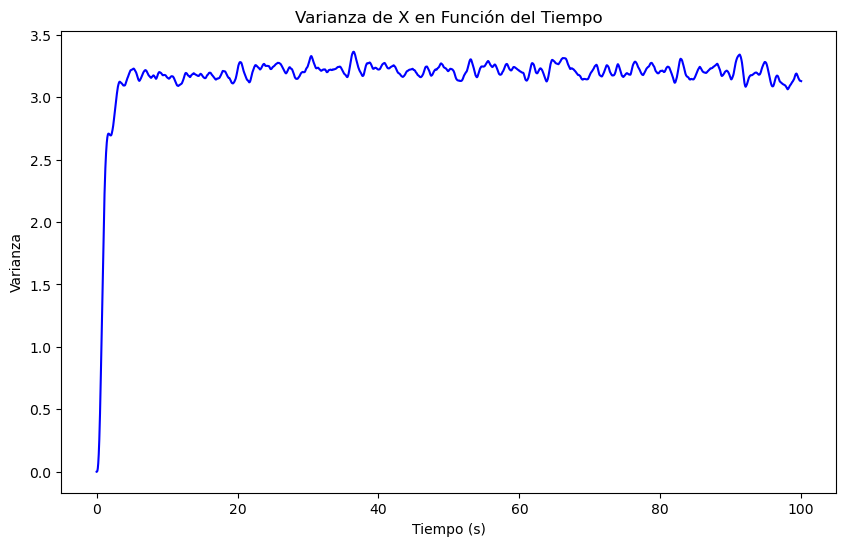

In [101]:
variances_x = np.var(positions_x, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(time_values, variances_x, color='blue')
plt.title('Varianza de X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza')
plt.show()

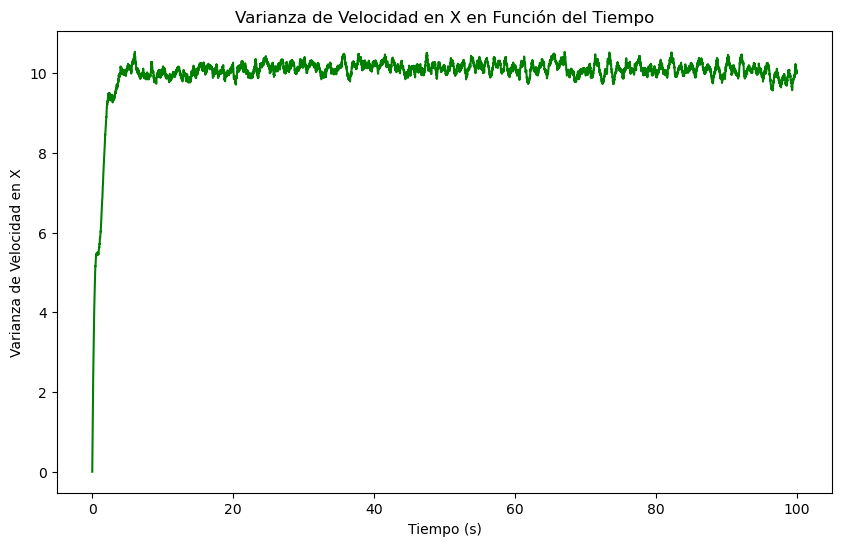

In [102]:
variances_vx = np.var(velocities_x, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time_values, variances_vx, color='green')
plt.title('Varianza de Velocidad en X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza de Velocidad en X')
plt.show()

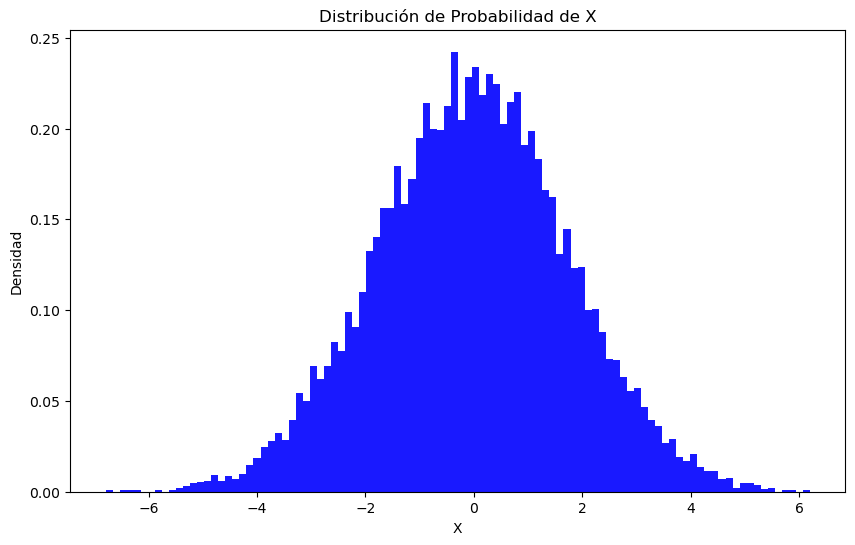

In [103]:
x_values = positions_x[:, -1]
plt.figure(figsize=(10, 6))
plt.hist(x_values, bins=100, density=True, alpha=0.9, color='blue')
plt.title('Distribución de Probabilidad de X')
plt.xlabel('X')
plt.ylabel('Densidad')
plt.show()

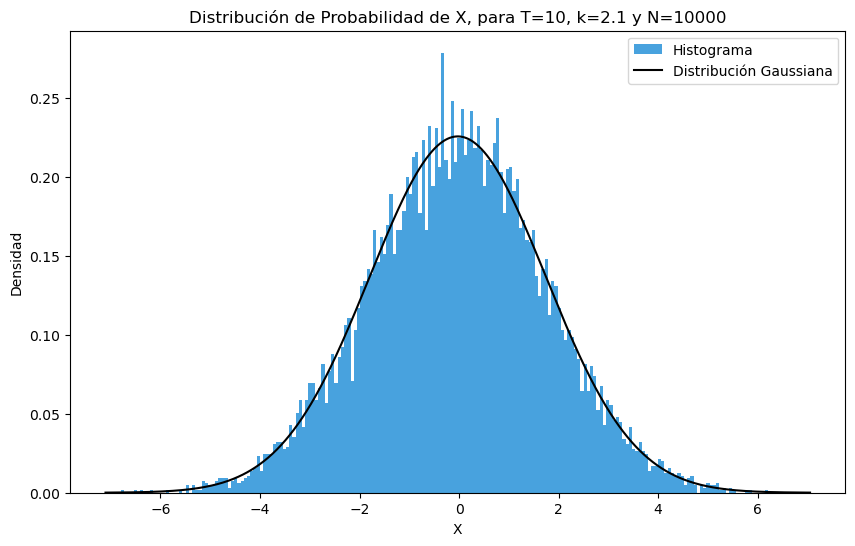

Media (mu): -0.026463296794909125
Desviación Estándar (sigma): 1.7689352522018493


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Supongamos que ya tienes tus datos en `positions_x`

# Calcular la media y la desviación estándar de los datos
mu, sigma = np.mean(positions_x[:, -1]), np.std(positions_x[:, -1])

# Crear un rango de valores para la variable X
x_range = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# Calcular la función de densidad de probabilidad (PDF) de la gaussiana
pdf = norm.pdf(x_range, mu, sigma)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(positions_x[:, -1], bins=200, density=True, alpha=0.9, color='#3498db', label='Histograma')

# Graficar la PDF de la gaussiana
plt.plot(x_range, pdf, color='black', label='Distribución Gaussiana')

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de Probabilidad de X, para T=10, k=2.1 y N=10000')
plt.xlabel('X')
plt.ylabel('Densidad')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir la media y la desviación estándar
print(f'Media (mu): {mu}')
print(f'Desviación Estándar (sigma): {sigma}')


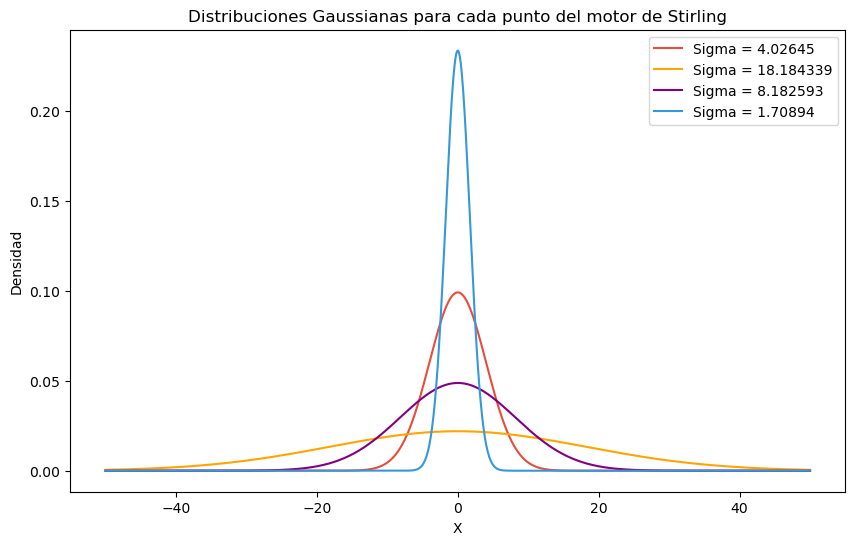

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de ejemplo
x_range = np.linspace(-50, 50, 1000)

# Valores diferentes de sigma
sigmas = [4.02645, 18.184339, 8.182593, 1.70894]

# Colores correspondientes a cada sigma
colores = ['#e74c3c', 'orange', 'purple', '#3498db']

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar las distribuciones gaussianas para diferentes sigmas con colores definidos
for sigma, color in zip(sigmas, colores):
    pdf = norm.pdf(x_range, 0, sigma)  # Media mu=0 para todas las gaussianas
    plt.plot(x_range, pdf, label=f'Sigma = {sigma}', color=color)

# Configurar el título y la leyenda
plt.title('Distribuciones Gaussianas para cada punto del motor de Stirling')
plt.xlabel('X')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()


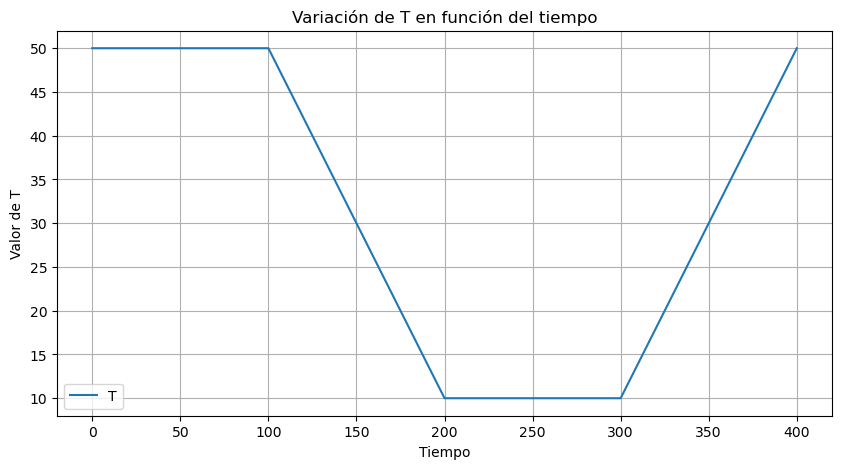

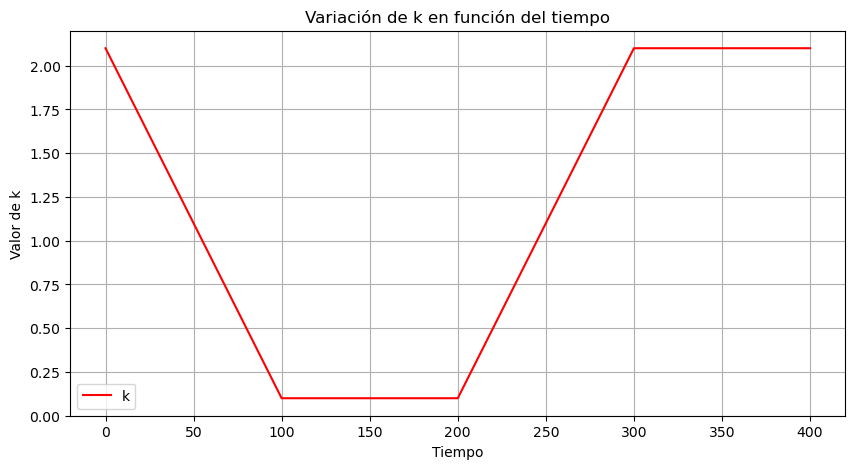

In [5]:
tiempo = []
valores_T = []
valores_k = []

# Simular el comportamiento a lo largo del tiempo
for time in range(401):
    if 0 <= time <= 100:
        T = 50.0  
        k = 2.1 - 0.02 * (time)
    
    elif 100 <= time <= 200:
        T = 50.0 - 0.4 * (time - 100) 
        k = 0.1
    
    elif 200 < time <= 300:
        T = 10  
        k =  0.1 + 0.02 * (time - 200)  
    
    elif 300 <= time <= 400:
        T = 10 + 0.4 * (time - 300)  
        k = 2.1
    
    # Guardar valores para el gráfico
    tiempo.append(time)
    valores_T.append(T)
    valores_k.append(k)

# Crear gráfico para T
plt.figure(figsize=(10, 5))
plt.plot(tiempo, valores_T, label='T')
plt.xlabel('Tiempo')
plt.ylabel('Valor de T')
plt.title('Variación de T en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico para k
plt.figure(figsize=(10, 5))
plt.plot(tiempo, valores_k, label='k', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Valor de k')
plt.title('Variación de k en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()